## MNIST

In [2]:
import numpy as np
import os
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


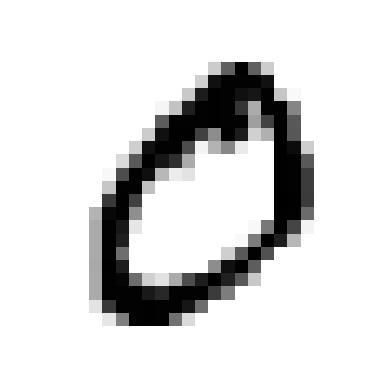

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x_train[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [4]:
y_train[1]

0

### SVM

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
from sklearn import datasets, metrics, preprocessing
from sklearn.svm import SVC
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Reshaping the array to 4-dims so that it can work with the Keras API
data_size = len(x_train)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
data_size = len(x_train)
x_train = x_train.reshape(data_size, -1)
x_train = preprocessing.scale(x_train)
data_size = len(x_test)
x_test = x_test.reshape(data_size, -1)
x_test = preprocessing.scale(x_test)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
# Define and train an svm model
svm = LinearSVC(dual=False)
svm.fit(x_train, y_train)

LinearSVC(dual=False)

In [10]:
svm.coef_
svm.intercept_

array([-1.22898841, -1.50839598, -1.098416  , -1.17706212, -1.24353687,
       -1.10763075, -1.18074556, -1.24185397, -1.04699692, -1.16118747])

In [11]:
prediction = svm.predict(x_test)
accuracy_score(y_test, prediction) # Accuracy

0.8974

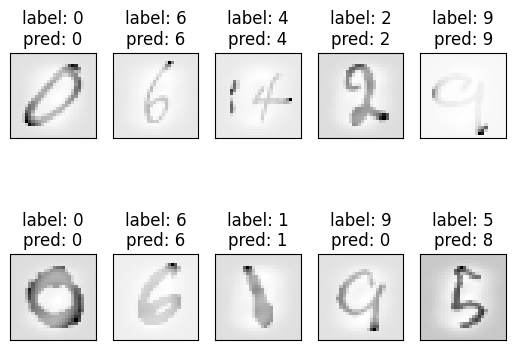

In [12]:
# function to convert float image to uint8, and map values in range 0-255
def process(image):
    image -= image.min()
    image /= image.max()
    image *= 255
    return image.astype(np.uint8)

# display predictions on some random images from test set
R, C = 2, 5
N = R * C
indices = np.random.randint(0, len(x_test), size=N)
for i, idx in enumerate(indices):
    test_image = x_test[idx].reshape((1, -1))
    prediction = svm.predict(test_image)[0]
    ax = plt.subplot(R, C, i + 1)
    plot_image = process(test_image.reshape((28, 28)))
    ax.title.set_text(f'label: {y_test[idx]}\npred: {prediction}')
    ax.imshow(plot_image, cmap='Greys')
    plt.xticks([]), plt.yticks([])
plt.show()

### NN

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [14]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 57s 29ms/step - loss: 0.2073 - accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0830 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0568 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0417 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0350 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0282 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0235 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0217 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 63s 34m

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0616 - accuracy: 0.9850


[0.0616421140730381, 0.9850000143051147]

1/1 [==============================] - 0s 214ms/step
9


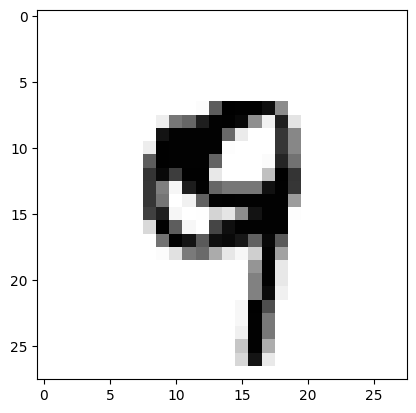

In [17]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())